# i. Perkenalan

Name    : Ibrahim Hasan

Batch   : FTDS 009

Dataset is acquired from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) regarding Customer Churn in telecomunication company.

The objective is to make a deep learning model that is able to predict customer behaviour whether they have a probability to churn or remain subscribing the services.

The models being tested are Sequential and Functional API. After the model were trained, the best model resulted will be performing model improvement using the parameter for model optimization.

# ii. Import Libraries

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Input
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle
import tensorflow as tf

# ii. Data Loading

In [372]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dataset observation using df.info to check the data type and missing values. There is something strange for `TotalCharges` feature which based on the above dataloading preview, it supposed to be a float or int type but it was indicated as object type. There is no missing values shown in the data according to the below information. Later on i will recheck to ensure.

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# iv. Exploratory Data Analysis

Drop feature `customerID` as it is not needed for the prediction due cardinality and considered not having any quality.

In [374]:
df.drop(['customerID'], axis=1, inplace=True)

Observation for non-standard missing value as based on df.info(), `TotalCharges` feature is stated as object while it is should be a float or int and found 11 row which consist of `Nan` values. Later on i will handle the missing values on data preparation stage.

In [375]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.loc[df['TotalCharges'].isna()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Define dataframe numerical and categorical for further exploration.

In [376]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[object])
df_num.drop(['SeniorCitizen'], axis=1, inplace=True)
df_num


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


Observation for outliers in numerical features, and found that the `TotalCharges` feature which indicating outliers based on skewness value.

In [377]:
for col in df_num:
    skew_val = df_num[col].skew()
    if skew_val >= -0.5 and skew_val <= 0.5:
        print(col, ':', skew_val, '(normal)')
    else:
        print(col, ':', skew_val, '(skewed)')

tenure : 0.2395397495619829 (normal)
MonthlyCharges : -0.22052443394398033 (normal)
TotalCharges : 0.961642499724251 (skewed)


# iv.i. Eda for customer profile

Firstly, we will observe the churn rate of the customer that is majority of the customers are remain stay, worth 73% of total customer or 5174 customers.

,Churn
No,5174
Yes,1869


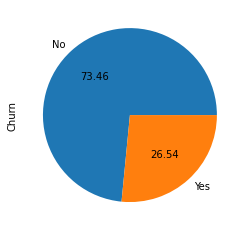

In [378]:
df.Churn.value_counts().plot(kind='pie', autopct='%.2f')
pd.DataFrame(df.Churn.value_counts())

Observation for `gender` feature, the amount of Male and Female customer comparison is equal for both side, as well as the churn rate which got around 13% between male and female whose say yes to terminate the service. It is safe to say that this feature has no certain pattern correlated to the label.

0
gender Churn      
Female No     2549
       Yes     939
Male   No     2625
       Yes     930

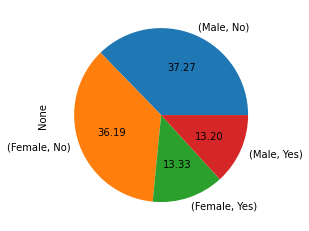

In [379]:
gender = df[['gender','Churn']]
gender.value_counts().plot(kind='pie', autopct='%.2f')
pd.DataFrame(gender.value_counts()).sort_index()

Observation for `SeniorCitizen` feature and showing majority of the customer is coming from non-senior citizen or we can say the productive age in class 0. The curn rate was better on productive age group with 23.6% compared to 41.6% for non-productive age group. Those figure actually quite self explanatory as senior citizen probably have few income streamline and will manage their spending efficiently or simply not really utilizing the product anymore.

churn rate on Productive age :  23.606168446026096
churn rate on Non-Productive age :  41.68126094570928


0
SeniorCitizen Churn      
0             No     4508
              Yes    1393
1             No      666
              Yes     476

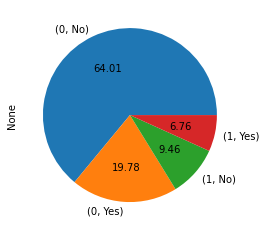

In [380]:
senior = df[['SeniorCitizen','Churn']]
senior_0 = senior.loc[senior['SeniorCitizen'] == 0]
senior_1 = senior.loc[senior['SeniorCitizen'] == 1]
senior.value_counts().plot(kind='pie', autopct='%.2f')

print('churn rate on Productive age : ', (senior_0['Churn'].value_counts()['Yes']/df['SeniorCitizen'].value_counts()[0].sum()) * 100), '%'
print('churn rate on Non-Productive age : ', (senior_1['Churn'].value_counts()['Yes']/df['SeniorCitizen'].value_counts()[1].sum()) * 100), '%'

pd.DataFrame(senior.value_counts()).sort_index()

Observation for `Partner` feature and showing the churn rate for customer with partner or family category apparently is better with only 20% churn rate than without partner which worth 32.9% churn rate.

This is more likely they need more telecommunication service such phone service, internet, streaming services, online security, etc, than customer without partner.

churn rate on with partner :  19.66490299823633
churn rate on without partner :  32.95797857731392


0
Partner Churn      
No      No     2441
        Yes    1200
Yes     No     2733
        Yes     669

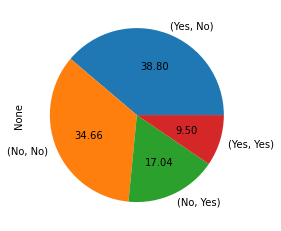

In [381]:
partner = df[['Partner','Churn']]
partner_y = partner.loc[partner['Partner'] == 'Yes']
partner_n = partner.loc[partner['Partner'] == 'No']
partner.value_counts().plot(kind='pie', autopct='%.2f')

print('churn rate on with partner : ', (partner_y['Churn'].value_counts()['Yes']/df['Partner'].value_counts()['Yes'].sum()) * 100), '%'
print('churn rate on without partner : ', (partner_n['Churn'].value_counts()['Yes']/df['Partner'].value_counts()['No'].sum()) * 100), '%'

pd.DataFrame(partner.value_counts()).sort_index()

Observation on Feature `Dependents` showing that the result is quite similar with the above category where customer with dependents has less churn rate with only 15% compared to customer without dependents.

churn rate on with dependents :  15.450236966824646
churn rate on without dependents :  31.279140482465028


0
Dependents Churn      
No         No     3390
           Yes    1543
Yes        No     1784
           Yes     326

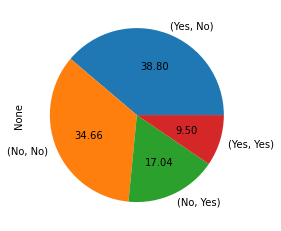

In [382]:
dependant = df[['Dependents','Churn']]
dep_y = dependant.loc[dependant['Dependents'] == 'Yes']
dep_n = dependant.loc[dependant['Dependents'] == 'No']
partner.value_counts().plot(kind='pie', autopct='%.2f')

print('churn rate on with dependents : ', (dep_y['Churn'].value_counts()['Yes']/df['Dependents'].value_counts()['Yes'].sum()) * 100), '%'
print('churn rate on without dependents : ', (dep_n['Churn'].value_counts()['Yes']/df['Dependents'].value_counts()['No'].sum()) * 100), '%'

pd.DataFrame(dependant.value_counts()).sort_index()

Define the list of categorical numerical features for further exploration.

In [383]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

Observation on numerical features, kindly see the markdown below the plot for the insight.

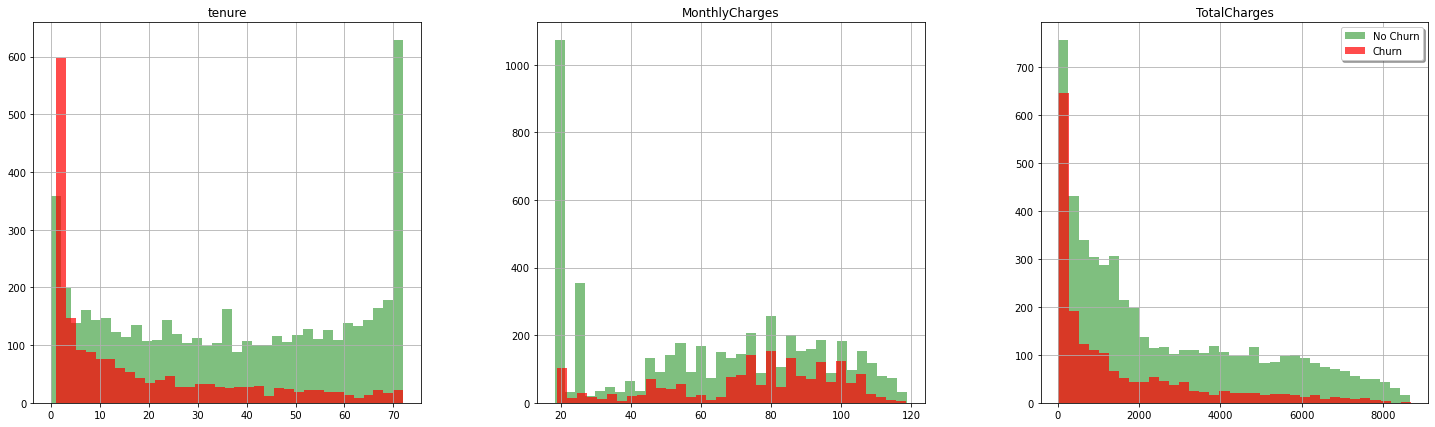

In [384]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7))
df[df.Churn == "No"][num_cols].hist(bins=35, color="green", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][num_cols].hist(bins=35, color="red", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

Insight for the numerical features :

1. Based on `tenure` feature, New customers is tend to churn out than old customers. Majority of the new customer below than 2 month was the group that had the highest churn rate and is gradually decrease by the longer time. Despite also generated a lot of new customer in the initial month of subscription, there are also significant amount of loyal customer which have been enjoying the service for more than 70 months.

2. According to `MonthlyCharges` feature we can see that the distribution is quite spreaded for the customer that is churn out. It is safe to say that there is no certain pattern/correlation between monthly charges and churn rate.

3. As we are generating many of new customer and also losing on the initial month, `TotalCharges` feature is showing that the majority of data points on Total charges is sit on the lower end of the distribution.

Observation for `Contract` feature, monthly customer is dominating the total customer with 55%, as well as the churn rate for its group which is the greatest with 42%.

Actually `Contract` feature showing quite similar result with `tenure` feature which explain the longer contract, the less churn rate.

churn rate on Monthly Contract :  42.70967741935484
churn rate on One Year Contract :  11.269517990495586
churn rate on Two Year Contract :  2.831858407079646


(None, '%')

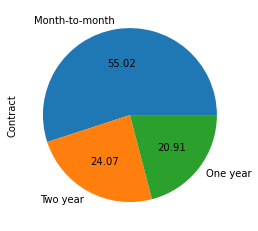

In [385]:
df.Contract.value_counts().plot(kind='pie', autopct='%.2f')
contract = df[['Contract','Churn']]
monthly = contract.loc[contract['Contract'] == 'Month-to-month']
annual = contract.loc[contract['Contract'] == 'One year']
two_year = contract.loc[contract['Contract'] == 'Two year']

print('churn rate on Monthly Contract : ', (monthly['Churn'].value_counts()['Yes']/df['Contract'].value_counts()['Month-to-month'].sum()) * 100), '%'
print('churn rate on One Year Contract : ', (annual['Churn'].value_counts()['Yes']/df['Contract'].value_counts()['One year'].sum()) * 100), '%'
print('churn rate on Two Year Contract : ', (two_year['Churn'].value_counts()['Yes']/df['Contract'].value_counts()['Two year'].sum()) * 100), '%'

Define `service` DF for further exploration regarding service provided and the churn rate.

In [386]:
service = df.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], axis=1)
service

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,DSL,No,Yes,No,No,No,No,No
1,Yes,DSL,Yes,No,Yes,No,No,No,No
2,Yes,DSL,Yes,Yes,No,No,No,No,Yes
3,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,No,DSL,Yes,No,No,No,No,No,No
7041,Yes,Fiber optic,No,No,No,No,No,No,Yes


Service column list.

In [387]:
serv_feats = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
serv_feats

['PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

Now we are moving to the service category. Not much we can explain here as the data only speak few points about the service and the churn, as follow :

Regarding the product :
1. Generally majority of the customer is utilizing `PhoneService` feature, which the most popular service consist of 6361 customers.
But `PhoneService` also was being the highest amount of customer churn which wort around 1700 customers. Despite the largest amount of customer, as well as the churn rate, we must evaluate this service to prevent further churn from the customer.

2. The second most popular service is `InternetService` feature with around 5517 customers. Mainly of the churn of internet service is from fiber optic cable provider. While DSL service is quite the opposite than fiber optic that is capturing slight amount of churn. At this point we have to take an immediate action to fix fiber optic service performance.

Other than that 2 services, there is no significant amount of churn regarding the respective product that being utilized by customer, as well as those service mainly not being subsribed by customer, showing on `No` category for each product that has fairly similar amount compared to the customer who are subscribed, shown on feature `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` and `StreamingMovies` feature.

as the addition that we can see on the chart below, the lowest amount of churn rate is from `OnlineSecurity` and `TechSupport`.



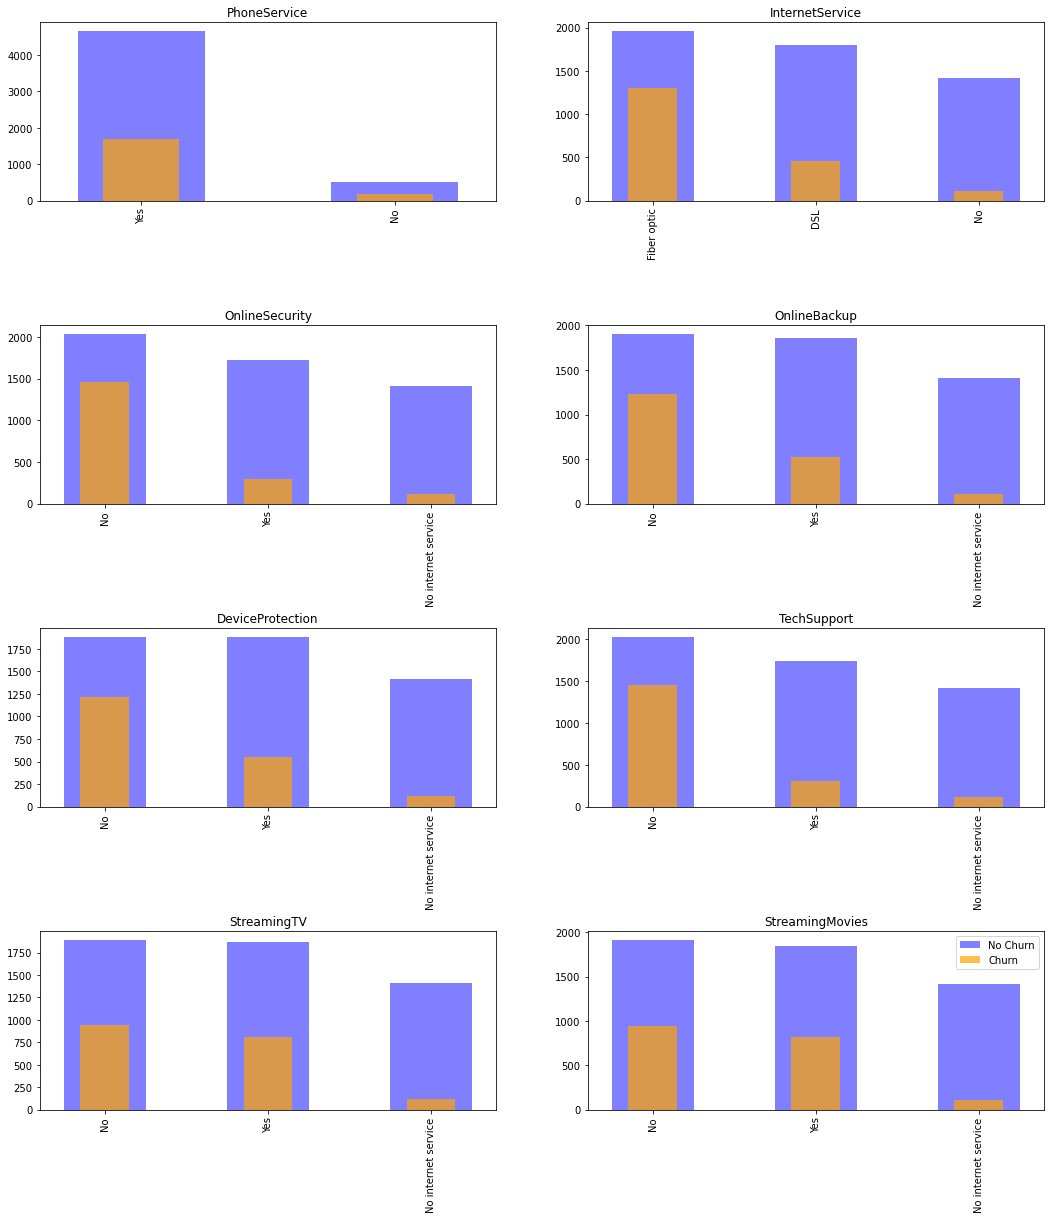

In [388]:
ROWS, COLS = 4, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, serv_feat in enumerate(serv_feats):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    service[service.Churn=='No'][serv_feat].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(serv_feat)
    service[service.Churn=='Yes'][serv_feat].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(serv_feat)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

# v. Data Preprocessing

replace label, and `SeniorCitizen` category with numerical value for further exploration.

In [389]:
df.Churn = df.Churn.replace({'No': 0, 'Yes': 1})
df.SeniorCitizen = df.SeniorCitizen.replace({0: 'No', 1: 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Correlation observation for numerical features to the label.

<AxesSubplot:>

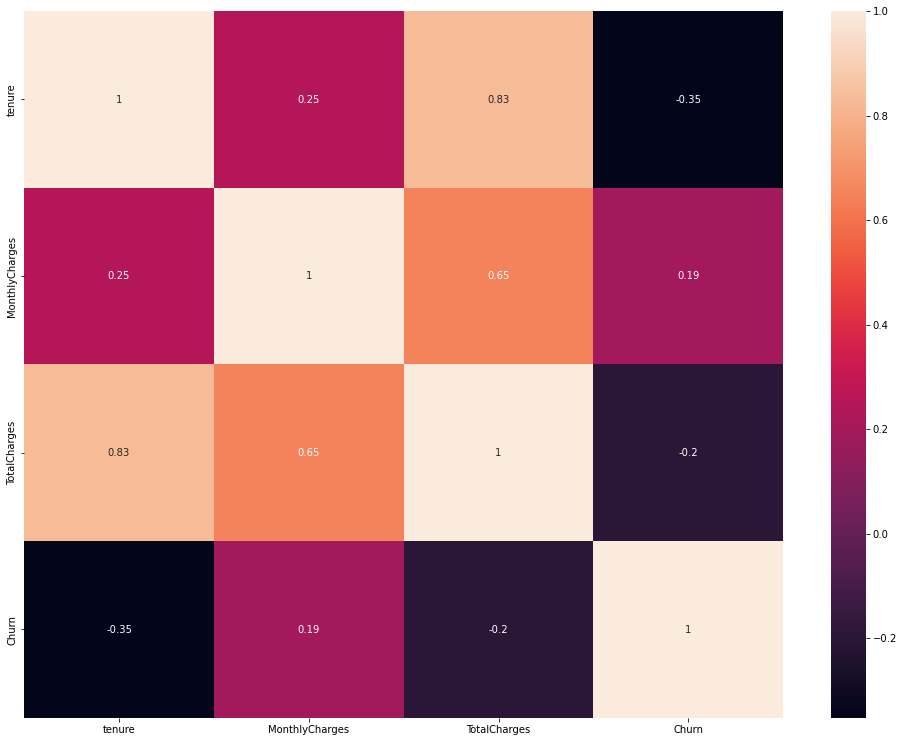

In [390]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(),annot=True)

Handling Missing Value on `TotalCharges` feature that has 11 row of missing value.

In [391]:
df.dropna(inplace=True)
df.shape

(7032, 20)

Split the data into trainval and test set.

In [392]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=39, stratify=y)

print('Train set size : ', X_trainval.shape)
print('Test set size : ', X_test.shape)

Train set size :  (5625, 19)
Test set size :  (1407, 19)


Another split for train and validation set.

In [393]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=39, stratify=y_trainval)

print('Train & validation set size : ', X_train.shape)
print('Test set size : ', X_val.shape)

Train & validation set size :  (5062, 19)
Test set size :  (563, 19)


Feature Selection to be trained which considered has weight among them.

In [394]:
X_train_fs = X_train.drop(['OnlineSecurity','SeniorCitizen','Partner','gender','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ,'PaperlessBilling', 'PaymentMethod','TotalCharges'], axis=1)
X_val_fs = X_val.drop(['OnlineSecurity','SeniorCitizen','Partner','gender','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ,'PaperlessBilling', 'PaymentMethod','TotalCharges'], axis=1)
X_test_fs = X_test.drop(['OnlineSecurity','SeniorCitizen','Partner','gender','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ,'PaperlessBilling', 'PaymentMethod','TotalCharges'], axis=1)

X_train_fs

,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges
4822,Yes,72,Yes,Fiber optic,Two year,104.90
1236,No,3,Yes,Fiber optic,Month-to-month,76.95
2356,No,46,Yes,DSL,Month-to-month,45.20
6486,No,5,Yes,DSL,Month-to-month,67.95
41,Yes,70,Yes,DSL,Two year,69.20
...,...,...,...,...,...,...
2654,No,1,Yes,Fiber optic,Month-to-month,90.75
2085,No,32,Yes,Fiber optic,Month-to-month,93.20
5397,No,6,Yes,Fiber optic,Month-to-month,84.85
773,No,5,Yes,Fiber optic,Month-to-month,88.90


feature list resulted from feature selection.

In [395]:
num_col_fs = ['tenure', 'MonthlyCharges']
cat_col_fs = ['Dependents', 'PhoneService', 'InternetService', 'Contract']

make sklearn pipeline for feature engineering such feature scaling and feature encoding.

In [396]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([('pipe_num', num_pipeline, num_col_fs), ('pipe_cat', cat_pipeline, cat_col_fs)])

Fit the feature engineering pipeline to the train data for saving into the pickle file for deployment purposes.

In [397]:
data_pipeline.fit(X_train_fs)

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Dependents', 'PhoneService',
                                  'InternetService', 'Contract'])])

Fit/transform the train/val/test data to pipeline transformer feature engineering.

In [399]:
train_pipe = data_pipeline.fit_transform(X_train_fs), y_train
val_pipe = data_pipeline.transform(X_val_fs), y_val
test_pipe = data_pipeline.transform(X_test_fs), y_test

Create tensorflow pipeline for train/val/test with batch 128.

In [400]:
X_train_pipe = tf.data.Dataset.from_tensor_slices((train_pipe)).batch(128)
X_val_pipe = tf.data.Dataset.from_tensor_slices((val_pipe)).batch(128)
X_test_pipe = tf.data.Dataset.from_tensor_slices(test_pipe).batch(128)

# vi. Model Definition

The models being test are Sequential and Functional API. After the model were trained, the best model resulted will be performing model improvement using the parameter for model optimization.

Metrics that will be used for model evaluation is accuracy and loss function, and also the classification report to see whether the model is able to predict each label accurately.

# vii. Model Training

Training first trial for Sequential model, starting from dense 16 to dense 1 gradually with relu activation and batch size 128.

In [401]:
model = Sequential()
model.add(Dense(16, input_shape=(12,), activation='relu')),
model.add(Dense(4, activation='relu')),
model.add(Dense(1, activation='sigmoid'))


In [402]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 16)                208       
                                                                 
 dense_78 (Dense)            (None, 4)                 68        
                                                                 
 dense_79 (Dense)            (None, 1)                 5         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


Compile model for first trial sequential with Adam optimizer and categorical crossentropy loss function.

In [403]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model with epochs = 300.

In [404]:
history = model.fit(X_train_pipe, epochs=300, validation_data=X_val_pipe)

Epoch 1/300
40/40 [==============================] - 1s 5ms/step - loss: 0.8324 - accuracy: 0.2679 - val_loss: 0.7523 - val_accuracy: 0.2753
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.4113 - val_loss: 0.6930 - val_accuracy: 0.5506
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6891 - val_loss: 0.6697 - val_accuracy: 0.7496
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7752 - val_loss: 0.6587 - val_accuracy: 0.7602
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7807 - val_loss: 0.6502 - val_accuracy: 0.7584
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7811 - val_loss: 0.6423 - val_accuracy: 0.7584
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7821 - val_loss: 0.6351 - val_accuracy: 0.7584
Epoch 8/300
4

head dataframe to see the result of the training and comparison for train set and validation set.

In [405]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.832445,0.267878,0.752268,0.275311
1,0.713806,0.411300,0.693015,0.550622
2,0.676887,0.689056,0.669714,0.749556
3,0.660854,0.775188,0.658652,0.760213
4,0.650520,0.780719,0.650154,0.758437


plotting the loss graph for the first trial comparing train set and validation set.

<AxesSubplot:>

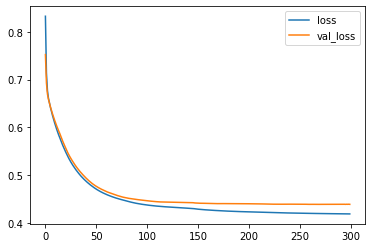

In [406]:
metrics[['loss','val_loss']].plot()

Plotting the accuracy graph for the first trial comparing train set and validation set.

<AxesSubplot:>

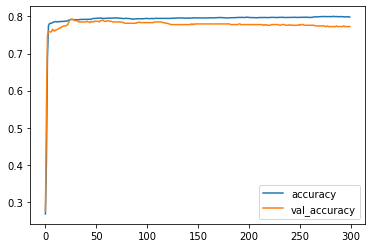

In [407]:
metrics[['accuracy','val_accuracy']].plot()

Classification report for the first trial model, setting 0.3 threshold in order to have a better balance between the class.

In [482]:
print('_______________Train set result_______________')
y_pred_train_seq = model.predict(X_train_pipe)
y_pred_train_seq = np.where(y_pred_train_seq > 0.3, 1, 0)
print(classification_report(y_train, y_pred_train_seq))

print('________________Test set result________________')
y_pred_seq = model.predict(X_test_pipe)
y_pred_seq = np.where(y_pred_seq > 0.3, 1, 0)
print(classification_report(y_test, y_pred_seq))

_______________Train set result_______________
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3717
           1       0.53      0.77      0.63      1345

    accuracy                           0.76      5062
   macro avg       0.72      0.76      0.73      5062
weighted avg       0.80      0.76      0.77      5062

________________Test set result________________
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1033
           1       0.56      0.78      0.65       374

    accuracy                           0.78      1407
   macro avg       0.74      0.78      0.75      1407
weighted avg       0.82      0.78      0.79      1407



Second trial for Sequential model, starting from dense 8 to output 1 with relu activation and batch size 128.

In [456]:
model_seq2 = Sequential()
model_seq2.add(Dense(8, input_shape=(12,), activation='relu')),
model_seq2.add(Dense(1, activation='sigmoid'))

Model Compile for the second trial sequential model with Adam optimizer and categorical crossentropy loss function.

In [457]:
model_seq2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the second trial sequential model with epochs = 300.

In [458]:
history2 = model_seq2.fit(X_train_pipe, epochs=300, validation_data=X_val_pipe)

Epoch 1/300
40/40 [==============================] - 1s 4ms/step - loss: 0.8566 - accuracy: 0.5273 - val_loss: 0.7692 - val_accuracy: 0.6217
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7506 - accuracy: 0.6059 - val_loss: 0.6850 - val_accuracy: 0.6430
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6337 - val_loss: 0.6164 - val_accuracy: 0.6679
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.6861 - val_loss: 0.5609 - val_accuracy: 0.7229
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7311 - val_loss: 0.5209 - val_accuracy: 0.7336
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7621 - val_loss: 0.4941 - val_accuracy: 0.7602
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7855 - val_loss: 0.4768 - val_accuracy: 0.7744
Epoch 8/300
4

Head dataframe of metrics for the second trial model.

In [459]:
metrics_seq2 = pd.DataFrame(history2.history)
metrics_seq2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.856607,0.527262,0.769229,0.621670
1,0.750580,0.605887,0.685001,0.642984
2,0.666149,0.633742,0.616392,0.667851
3,0.596399,0.686092,0.560853,0.722913
4,0.541991,0.731134,0.520908,0.733570


Plotting the loss graph for the second trial comparing train set and validation set, and this time looked slightly better compared to the previous model as both line got closer but seemed will not to converged.

<AxesSubplot:>

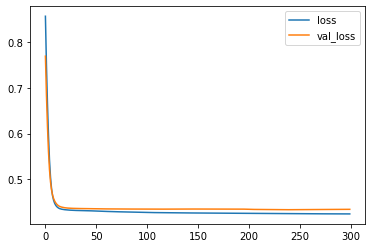

In [460]:
metrics_seq2[['loss','val_loss']].plot()

For accuracy on the second trial, the line is also showing better as they are getting closer each other.

<AxesSubplot:>

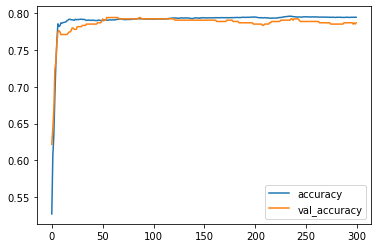

In [461]:
metrics_seq2[['accuracy','val_accuracy']].plot()

Classification report for the second trial model, setting 0.3 threshold in order to have a better balance between the class.

In [486]:
print('_______________Train set result_______________')
y_pred_train_seq2 = model_seq2.predict(X_train_pipe)
y_pred_train_seq2 = np.where(y_pred_train_seq2 > 0.3, 1, 0)
print(classification_report(y_train, y_pred_train_seq2))

print('_______________Test set result_______________')
y_pred_seq2 = model_seq2.predict(X_test_pipe)
y_pred_seq2 = np.where(y_pred_seq2 > 0.3, 1, 0)
print(classification_report(y_test, y_pred_seq2))

_______________Train set result_______________
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3717
           1       0.53      0.76      0.62      1345

    accuracy                           0.75      5062
   macro avg       0.71      0.76      0.72      5062
weighted avg       0.80      0.75      0.77      5062

_______________Test set result_______________
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1033
           1       0.56      0.77      0.65       374

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407



Third trial Model for Functional API with 1 hidden layer starting with dense 8 as based on the previous trial, the fewer dense resulting more stable outcome.

In [463]:
data_in = Input(shape=(12,))
hidden_1 = Dense(8, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

model_fun = Model(inputs=data_in, outputs=out)

In [464]:
model_fun.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_95 (Dense)            (None, 8)                 104       
                                                                 
 dense_96 (Dense)            (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


Compile model and training for the third trial functional API with Adam optimizer and categorical crossentropy loss function, epochs = 300.

In [465]:
model_fun.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_mf = model_fun.fit(X_train_pipe, epochs=300, validation_data=X_val_pipe)

Epoch 1/300
40/40 [==============================] - 1s 5ms/step - loss: 0.6104 - accuracy: 0.6683 - val_loss: 0.6020 - val_accuracy: 0.7158
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7323 - val_loss: 0.5590 - val_accuracy: 0.7336
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7343 - val_loss: 0.5292 - val_accuracy: 0.7336
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7343 - val_loss: 0.5079 - val_accuracy: 0.7336
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7351 - val_loss: 0.4908 - val_accuracy: 0.7353
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7582 - val_loss: 0.4774 - val_accuracy: 0.7620
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7857 - val_loss: 0.4673 - val_accuracy: 0.7620
Epoch 8/300
4

Head of dataframe of metrics for the third trial model.

In [466]:
metrics_mf = pd.DataFrame(history_mf.history)
metrics_mf.head()

,loss,accuracy,val_loss,val_accuracy
0,0.610389,0.668313,0.601964,0.715808
1,0.559505,0.732319,0.559033,0.733570
2,0.525403,0.734295,0.529227,0.733570
3,0.502649,0.734295,0.507854,0.733570
4,0.485908,0.735085,0.490849,0.735346


Plotting the loss graph for the third trial comparing train set and validation set, and showing they are more separated each other towards the edge.

<AxesSubplot:>

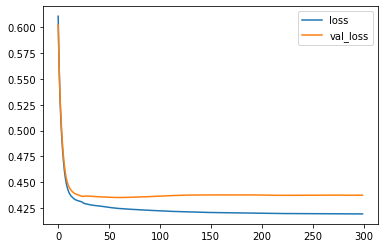

In [467]:
metrics_mf[['loss','val_loss']].plot()

Plotting the accuracy graph for the third trial comparing train set and validation set, and the result is looked little unstable but still quite almost close each other.

<AxesSubplot:>

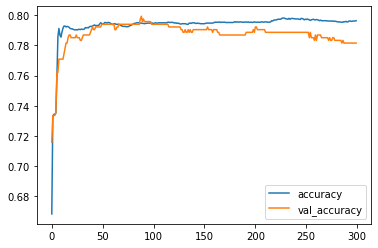

In [468]:
metrics_mf[['accuracy','val_accuracy']].plot()

Classification report for the third trial model, setting 0.3 threshold in order to have a better balance between the class.

In [483]:
print('_______________Train set result_______________')
y_pred_train_mf = model_fun.predict(X_train_pipe)
y_pred_train_mf = np.where(y_pred_train_mf > 0.3, 1, 0)
print(classification_report(y_train, y_pred_train_mf))

print('_______________Test set result_______________')
y_pred_mf = model_fun.predict(X_test_pipe)
y_pred_mf = np.where(y_pred_mf > 0.3, 1, 0)
print(classification_report(y_test, y_pred_mf))

_______________Train set result_______________
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      3717
           1       0.54      0.75      0.63      1345

    accuracy                           0.76      5062
   macro avg       0.72      0.76      0.73      5062
weighted avg       0.80      0.76      0.77      5062

_______________Test set result_______________
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1033
           1       0.56      0.76      0.65       374

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407



# viii. Model Evaluation

Based on three trial model, the best model according to the graph and classification report is sequential on the second trial. The classification report is actually showing fairly similar accuracy between them, which is around 78% f1 weighted score. But the second trial sequential model is showing more stable outcome according to the graph plotting that indicating closer beetween the line of train and validation set of both loss and accuracy.

Therefore i will be using the second trial sequential model for further improvement using necessary parameter.

# viii.i. Model Improvement

First trial of model improvement is adding dropout layer with 0.2 rate, and adding dense layer with 4 neurons before the output layer.

In [423]:
model_seq1_imp = Sequential()
model_seq1_imp.add(Dense(8, input_shape=(12,), activation='relu')),
model_seq1_imp.add(Dropout(0.2)),
model_seq1_imp.add(Dense(4, activation='relu')),
model_seq1_imp.add(Dropout(0.2)),
model_seq1_imp.add(Dense(1, activation='sigmoid'))

Compile model for first trial model improvement with Adam optimizer and categorical crossentropy loss function.

In [424]:
model_seq1_imp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model with epochs = 300.

In [425]:
history1_imp = model_seq1_imp.fit(X_train_pipe, epochs=300, validation_data=X_val_pipe)

Epoch 1/300
40/40 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.6250 - val_loss: 0.6025 - val_accuracy: 0.7229
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7045 - val_loss: 0.5572 - val_accuracy: 0.7638
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7284 - val_loss: 0.5211 - val_accuracy: 0.7691
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7416 - val_loss: 0.4962 - val_accuracy: 0.7744
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7550 - val_loss: 0.4797 - val_accuracy: 0.7744
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7629 - val_loss: 0.4691 - val_accuracy: 0.7691
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7623 - val_loss: 0.4613 - val_accuracy: 0.7709
Epoch 8/300
4

Dataframe of metrics for the first trial model improvement.

In [426]:
metrics_seq1_imp = pd.DataFrame(history1_imp.history)
metrics_seq1_imp.head()

,loss,accuracy,val_loss,val_accuracy
0,0.658638,0.625049,0.602535,0.722913
1,0.603755,0.704465,0.557161,0.763766
2,0.563573,0.728368,0.521105,0.769094
3,0.538500,0.741604,0.496183,0.774423
4,0.519702,0.755038,0.479740,0.774423


plotting the loss graph for the first trial model improvement comparing train set and validation set which showing good improvement but quite little unstable.

<AxesSubplot:>

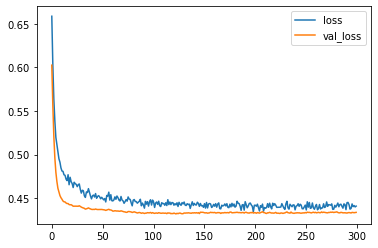

In [427]:
metrics_seq1_imp[['loss','val_loss']].plot()

plotting the loss graph for the first trial model improvement comparing train set and validation set that is also showing better improvement but a bit unstable.

<AxesSubplot:>

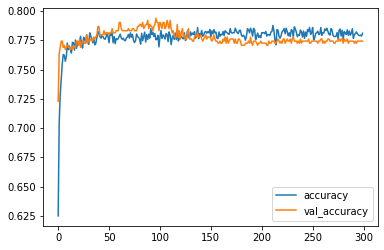

In [428]:
metrics_seq1_imp[['accuracy','val_accuracy']].plot()

Classification report for the first trial model improvement, setting 0.3 threshold in order to have a better balance between the class, showing quite similar f1 weighted score with 78%.

In [484]:
print('_______________Train set result_______________')
y_pred_train_seq1_imp = model_seq1_imp.predict(X_train_pipe)
y_pred_train_seq1_imp = np.where(y_pred_train_seq1_imp > 0.3, 1, 0)
print(classification_report(y_train, y_pred_train_seq1_imp))

print('_______________Test set result_______________')
y_pred_seq1_imp = model_seq1_imp.predict(X_test_pipe)
y_pred_seq1_imp = np.where(y_pred_seq1_imp > 0.3, 1, 0)
print(classification_report(y_test, y_pred_seq1_imp))

_______________Train set result_______________
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      3717
           1       0.52      0.79      0.63      1345

    accuracy                           0.75      5062
   macro avg       0.72      0.77      0.72      5062
weighted avg       0.81      0.75      0.77      5062

_______________Test set result_______________
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1033
           1       0.55      0.78      0.65       374

    accuracy                           0.78      1407
   macro avg       0.73      0.78      0.74      1407
weighted avg       0.81      0.78      0.79      1407



Second trial of model Improvement is only adding dropout layer with 0.2 rate as the difference between the best baseline model.

In [430]:
model_seq2_imp = Sequential()
model_seq2_imp.add(Dense(8, input_shape=(12,), activation='relu')),
model_seq2_imp.add(Dropout(0.2)),
model_seq2_imp.add(Dense(1, activation='sigmoid'))

compile model for second trial model improvement with Adam optimizer and categorical crossentropy loss function.

In [431]:
model_seq2_imp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train the model with epochs = 300.

In [432]:
history3 = model_seq2_imp.fit(X_train_pipe, epochs=300, validation_data=X_val_pipe)

Epoch 1/300
40/40 [==============================] - 1s 4ms/step - loss: 0.7875 - accuracy: 0.3420 - val_loss: 0.7401 - val_accuracy: 0.3570
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5089 - val_loss: 0.6644 - val_accuracy: 0.6128
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6845 - val_loss: 0.5886 - val_accuracy: 0.7425
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7420 - val_loss: 0.5302 - val_accuracy: 0.7655
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7657 - val_loss: 0.4989 - val_accuracy: 0.7744
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7693 - val_loss: 0.4814 - val_accuracy: 0.7762
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7752 - val_loss: 0.4707 - val_accuracy: 0.7726
Epoch 8/300
4

Head dataframe of metrics for the second trial model improvement.

In [433]:
metrics_seq2_imp = pd.DataFrame(history3.history)
metrics_seq2_imp.head()

,loss,accuracy,val_loss,val_accuracy
0,0.787463,0.341960,0.740137,0.357016
1,0.694569,0.508890,0.664429,0.612789
2,0.616525,0.684512,0.588567,0.742451
3,0.554815,0.741999,0.530198,0.765542
4,0.513336,0.765705,0.498919,0.774423


plotting the loss graph for the second trial model improvement comparing train set and validation set which showing both lines is converged.

<AxesSubplot:>

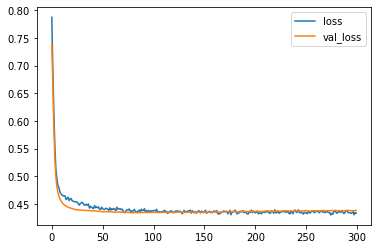

In [434]:
metrics_seq2_imp[['loss','val_loss']].plot()

Plotting the accuracy graph for the second trial model improvement comparing train set and validation set which showing both lines is fairly stable and really close each other.

<AxesSubplot:>

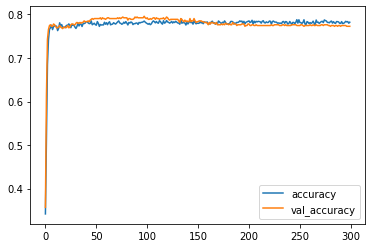

In [435]:
metrics_seq2_imp[['accuracy','val_accuracy']].plot()

Classification report for the second trial model improvement, setting 0.3 threshold in order to have a better balance between the class, showing quite similar f1 weighted score with 78%.

In [485]:
print('_______________Train set result_______________')
y_pred_train_seq2_imp = model_seq2_imp.predict(X_train_pipe)
y_pred_train_seq2_imp = np.where(y_pred_train_seq2_imp > 0.3, 1, 0)
print(classification_report(y_train, y_pred_train_seq2_imp))

print('_______________Test set result_______________')
y_pred_seq2_imp = model_seq2_imp.predict(X_test_pipe)
y_pred_seq2_imp = np.where(y_pred_seq2_imp > 0.3, 1, 0)
print(classification_report(y_test, y_pred_seq2_imp))

_______________Train set result_______________
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3717
           1       0.52      0.77      0.62      1345

    accuracy                           0.75      5062
   macro avg       0.71      0.76      0.72      5062
weighted avg       0.80      0.75      0.76      5062

_______________Test set result_______________
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.55      0.77      0.65       374

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407



# ix. Model Saving

Save the feature engineering pipeline to the pickle file for deployment purposes.

In [ ]:
with open('data_pipeline.pkl', 'wb') as f:
    pickle.dump(data_pipeline, f)

Save the best model improved for deployment purposes.

In [ ]:
model_seq2_imp.save('model.h5')

# x. Model Inference

Creating inference data for testing.

In [474]:
d_inf = pd.DataFrame([{'Dependents': 'Yes', 'tenure':12, 'PhoneService':'Yes', 'InternetService':'DSL', 'Contract':'One year', 'MonthlyCharges': '90'}])
d_inf

,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges
0,Yes,12,Yes,DSL,One year,90


transform inference data to pipeline transformer feature engineering.

In [475]:
inf_pipe = data_pipeline.transform(d_inf)

predict the inference data with the best model.

In [476]:
pred_inf = model_seq2_imp.predict(inf_pipe)

Create dataframe of inference data with the prediction result.

In [477]:
pred_inf_round = np.where(pred_inf > 0.3, 1, 0)
pred_inf_round_df = pd.DataFrame(pred_inf_round, columns=['prediction'])
pred_inf_round_df

,prediction
0,0


Concatenate the inference dataframe with the prediction result.

In [478]:
pd_concat_inf = pd.concat([d_inf, pred_inf_round_df], axis=1)
pd_concat_inf

,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,prediction
0,Yes,12,Yes,DSL,One year,90,0


The prediction of the inference data is probably customer will remain subscribed.

# xi. Pengambilan Kesimpulan

Here are the conclusions from several times of training model for neural network especially for this dataset.

1. The lower of layer and dense is the better and stable result.

2. Model improvement using dropout layer with 0.2 showing quite similar accuracy compared to best baseline model but resulting closer/converged both lines shown on graph.

3. All of the classification report showing that the model is good fit if comparing training set and test set which had not significant different between them in terms of f1 weighted score.

4. Threshold for classification report is set tp 0.3 instead of 0.5 in order to have a better balance between the class. If the threshold is set to 0.5, the model seemed to reffering to certain class as the label is imbalance.

5. Best model resulted is Sequential model with dense 8 to output 1 with relu activation, adding 1 layer droput regularization, and batch size 128.